##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [5]:
!which python

/usr/local/bin/python


In [3]:
import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 5s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

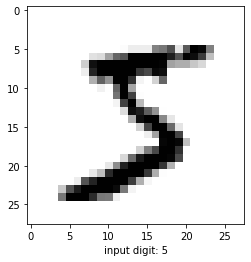

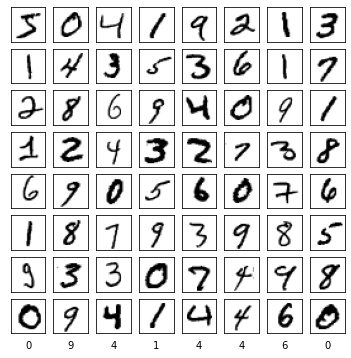

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
# plt.colorbar()
plt.grid(False)
plt.xlabel("input digit: {}".format(y_train[0]))
plt.show()

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i], cmap='binary')
    axi.set(xticks=[], yticks=[], xlabel = y_train[i])

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2022-08-06 23:17:19.397415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [11]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.03499352,  0.3670534 ,  0.13956825,  0.60586154,  0.2497639 ,
        -0.36797544,  0.40533563,  0.00431216,  0.26348636,  0.358939  ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [12]:
tf.nn.softmax(predictions).numpy()

array([[0.07660577, 0.11451654, 0.09121635, 0.14540565, 0.10184273,
        0.05490972, 0.11898549, 0.07967676, 0.1032499 , 0.11359107]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [14]:
loss_fn(y_train[:1], predictions).numpy()

2.9020648

In [15]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [16]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2972 - accuracy: 0.9138
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1461 - accuracy: 0.9566
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1097 - accuracy: 0.9671
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9718
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9759
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0648 - accuracy: 0.9798
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0594 - accuracy: 0.9807
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9828
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9846
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.045

In [17]:
print(history.history.keys())

model.summary()

dict_keys(['loss', 'accuracy'])
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


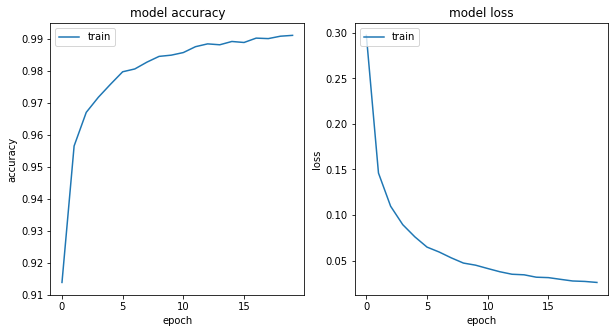

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(history.history['accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train' ], loc='upper left')
# plt.show()
# summarize history for loss
ax2.plot(history.history['loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
 
# plt.show()

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [19]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0793 - accuracy: 0.9818 - 499ms/epoch - 2ms/step


[0.07933616638183594, 0.9818000197410583]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [20]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [21]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.1511141e-12, 1.9994009e-14, 1.1857352e-08, 1.1118332e-06,
        4.3683460e-20, 2.5201088e-11, 4.6124452e-22, 9.9999893e-01,
        1.5094638e-13, 5.1772191e-09],
       [9.2277362e-15, 5.3944600e-09, 1.0000000e+00, 4.8761988e-11,
        1.3691995e-26, 3.5326772e-12, 6.6034502e-15, 2.4139532e-26,
        3.2956161e-14, 1.1450694e-27],
       [2.6685475e-12, 9.9983954e-01, 2.7319913e-05, 2.3665518e-09,
        3.2451831e-07, 3.2564690e-10, 1.0878526e-07, 5.4034754e-05,
        7.8719066e-05, 6.8742199e-11],
       [9.9999988e-01, 3.1143474e-13, 2.0914953e-10, 4.1960310e-15,
        4.3112812e-11, 4.8540971e-10, 4.1592156e-09, 7.5321855e-09,
        4.8056692e-17, 1.1154552e-07],
       [1.6277384e-06, 2.8180795e-14, 7.8081676e-08, 1.9049922e-12,
        9.9949896e-01, 3.9763988e-09, 2.8464326e-08, 3.3463198e-08,
        4.5143662e-09, 4.9923069e-04]], dtype=float32)>

In [22]:
y_out = probability_model(x_test[:1])
y_out_np = y_out.numpy().squeeze()

In [23]:
print(type(y_out_np))
import numpy as np
print('Call the classes: {}'.format(np.argmax(probability_model.predict(x_test), axis=-1)))

<class 'numpy.ndarray'>
313/313 [==============================] - 1s 2ms/step
Call the classes: [7 2 1 ... 4 5 6]


In [24]:
# y_out = probability_model.predict_on_batch(x_test[:100])
y_out = probability_model.predict(x_test[:100])

4/4 [==============================] - 0s 2ms/step


In [25]:
import numpy as np
print('The probobality is  {}'.format(y_out_np))
print('The output digit is {}'.format(np.argmax(y_out_np)))

The probobality is  [2.1511059e-12 1.9993857e-14 1.1857352e-08 1.1118321e-06 4.3683295e-20
 2.5200944e-11 4.6124806e-22 9.9999893e-01 1.5094553e-13 5.1771996e-09]
The output digit is 7


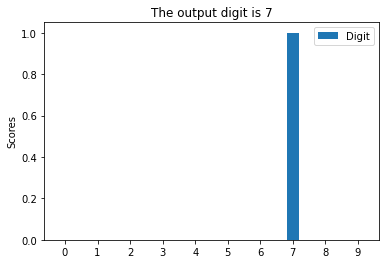

In [26]:
import matplotlib.pyplot as plt
labels = [ str(x) for x in range(10) ]
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
ax.bar(labels, y_out_np, width,  label='Digit')
ax.set_ylabel('Scores')
ax.set_title('The output digit is {}'.format(np.argmax(y_out_np)))
ax.legend()
plt.show()

In [27]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [29]:
import os 
model.save(os.path.join('saved_model/my_model','my_model.h5'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
